# Load packages

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import minimize
from scipy.stats import gumbel_r
from matplotlib.pyplot import cm
import math
import matplotlib
import matplotlib.colors as mcolors
from scipy.optimize import fsolve

import sympy
from sympy import *
from sympy import symbols, Eq, solve
from shapely.geometry import LineString


%matplotlib inline
import warnings
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cmasher as cmr
# plt.style.use('ggplot')


Input = 'Input2'
output = 'Output3'

# Load data

In [2]:
GB = pd.read_csv(f'1_Input/{Input}/GB.csv', index_col=0)
USA = pd.read_csv(f'1_Input/{Input}/USA.csv', index_col=0)
FR = pd.read_csv(f'1_Input/{Input}/FR.csv', index_col=0)
BE = pd.read_csv(f'1_Input/{Input}/BE.csv', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1980 - 1990', '1990 - 2000', '2000 - 2010']
yrsl_USA = ['1981 - 1991', '1991 - 2001', '2001 - 2009']
yrsl_be = ['1996 - 2006', '2006 - 2016']
yrsl_fr = ['1980 - 1990', '1990 - 2000', '2000 - 2010', '2010 - 2020']

yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

display(BE)

,AI,EI,Sr,AI 1996 - 2006,EI 1996 - 2006,omega 1996 - 2006,P 1996 - 2006,Ep 1996 - 2006,T 1996 - 2006,SI 1996 - 2006,...,dp_change 2006 - 2016,sp_change 2006 - 2016,dt_change 2006 - 2016,st_change 2006 - 2016,sd_change 2006 - 2016,de_change 2006 - 2016,se_change 2006 - 2016,ST_change 2006 - 2016,Sr expected 2006 - 2016,Sr deviation 2006 - 2016
Membre Pont,0.532849,0.434162,158.552656,0.469213,0.465981,5.352361,3.487328,1.636299,9.004473,0.211567,...,-0.071722,-0.042270,0.125987,-0.001041,-0.041228,-0.007507,-0.005072,0.010269,211.056012,-61.953371
Treignes,0.647399,0.547112,178.185446,0.611601,0.566044,3.573454,2.618952,1.601753,9.372315,0.135761,...,0.007467,-0.024832,0.195680,0.000628,-0.025460,-0.008150,-0.005978,0.011936,178.177572,-21.387819
Chooz,0.679134,0.523281,175.199838,0.620397,0.546550,3.002397,2.752888,1.707882,9.792182,0.162252,...,-0.061117,-0.119827,0.111411,-0.000811,-0.119016,-0.008905,-0.005265,0.018342,174.530290,-33.007338
Jemelle,0.625560,0.487600,162.435307,0.548463,0.536033,4.692788,2.921447,1.602306,8.848249,0.122328,...,0.076975,-0.157770,0.072602,-0.000350,-0.157421,-0.007278,-0.005222,0.086189,227.551233,-81.511828
Hastiere,0.745116,0.618520,152.829310,0.728547,0.615180,3.024358,2.210204,1.610236,9.794496,0.110032,...,0.027056,0.156639,0.174047,-0.000254,0.156893,-0.005575,-0.004990,0.014044,177.229341,-2.764223
Warnant,0.746523,0.632127,134.490129,0.709747,0.583720,2.761879,2.248256,1.595692,9.696472,0.105224,...,0.002354,0.003831,0.131815,-0.000291,0.004122,-0.003963,-0.004885,0.001723,176.790634,10.437806
Wiheries,0.738507,0.569325,146.383990,0.672653,0.571115,2.872196,2.344506,1.577039,9.423652,0.107734,...,0.040812,-0.024324,0.095179,0.000930,-0.025254,-0.009724,-0.005446,0.021672,159.011682,-18.001792
Huccorgne,0.813393,0.737316,230.994460,0.729271,0.704090,5.864375,2.183539,1.592391,10.338824,0.109324,...,0.105190,-0.017628,-0.013577,0.000387,-0.018015,-0.001353,-0.005113,0.095392,278.380493,-17.708339
Amay,0.675709,0.561681,205.445610,0.612582,0.592998,4.764616,2.673531,1.637757,9.651630,0.148446,...,-0.039503,-0.067846,0.081637,-0.000473,-0.067373,-0.008436,-0.005816,0.000042,220.135636,-40.634192


# Normal Budyko plot

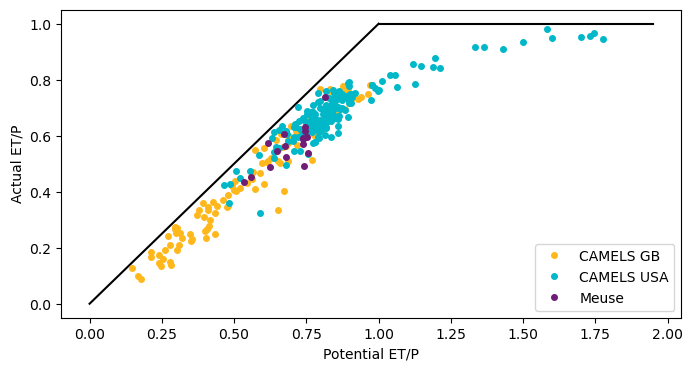

In [3]:
plt.figure(figsize=(8,4))

budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        plt.plot(AI, EI, marker='.', c = colorsTU[u], alpha=1, markersize = 8)

legend_el = [Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[0], markerfacecolor=colorsTU[0], label=dataset_names[0], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[1], markerfacecolor=colorsTU[1], label=dataset_names[1], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[2], markerfacecolor=colorsTU[2], label=dataset_names[2], markersize = 8)]

plt.legend(handles=legend_el, loc='lower right')

plt.savefig(f'2_Output/{output}/Budyko_normal_1.png')   

# Plot Sr values 

## Total time period

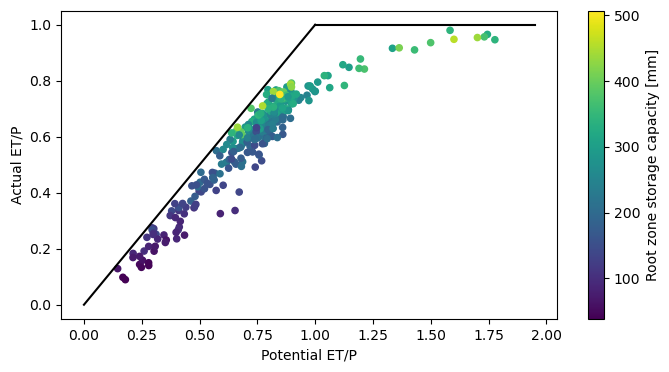

In [11]:
plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

AI_total = []
EI_total = []
Sr_total = []

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        Sr = dataset.iloc[i]['Sr']
        
        AI_total.append(AI)
        EI_total.append(EI)
        Sr_total.append(Sr)
        
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='viridis', s=20)
plt.colorbar(label='Root zone storage capacity [mm]')    
    
plt.savefig(f'2_Output/{output}/Budyko_colored_Sr.png')   

## Sr deviations per decade (per dataset)

In [8]:
for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(8,4))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel("Actual ET/P")
            plt.xlabel("Potential ET/P")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=40)
            plt.colorbar(label='Deviation in root zone storage capacity [mm]')   
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'2_Output/{output}/Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}4.png')   
            plt.close(fig)

## Sr deviations combined

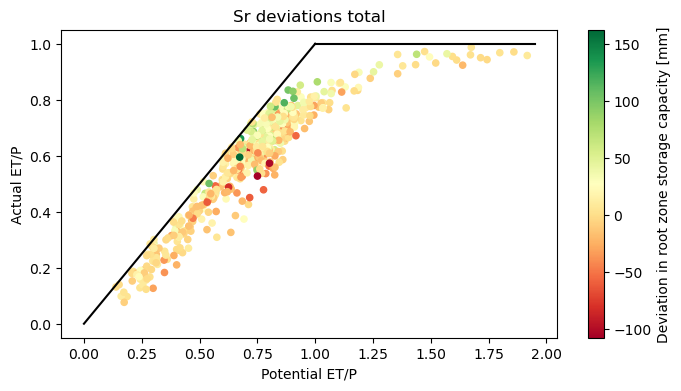

In [5]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                
cmap = cmr.pride
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=20)
plt.colorbar(label='Deviation in root zone storage capacity [mm]')   
plt.title(f'Sr deviations total')
    
plt.savefig(f'2_Output/{output}/Deviation_Sr_all2.png')   